### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2.3 탐색적 데이터 분석해 보기

가설 설정과 시각화를 반복하며 예측 성능에 유용한 새로운 feature를 만든다.

## 2.3.1 Pandas Profiling으로 개요 확인하기

In [1]:
import pandas as pd
import pandas_profiling

train = pd.read_csv('../input/titanic/train.csv')
train.profile_report()

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/842440334.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 자료형 : Numeric, Categorical, Boolean, Text
- 세 가지 이상의 값을 갖는 category 변수의 경우 0, 1, 2와 같이 인코딩하면 머신러닝 과정에서 잘못된 관계성이 학습될 수 있다.
- 따라서 One-hot 인코딩을 통해 해당 변수를 세 개의 열로 전개하여 0과 1로 표현하기도 한다.

## 2.3.2 feature와 목적 변수의 관계 확인하기

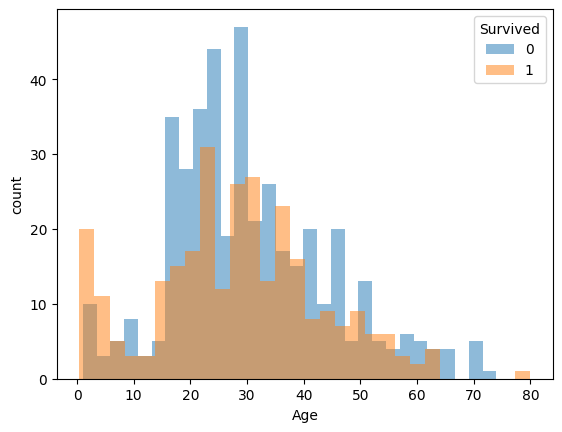

In [2]:
# Age와 Survived의 관계
# 2,30대는 생존률이 낮다.

import matplotlib.pyplot as plt
plt.hist(train.loc[train['Survived']==0, 'Age'].dropna(),
        bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived']==1, 'Age'].dropna(),
        bins=30, alpha=0.5, label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title = 'Survived')

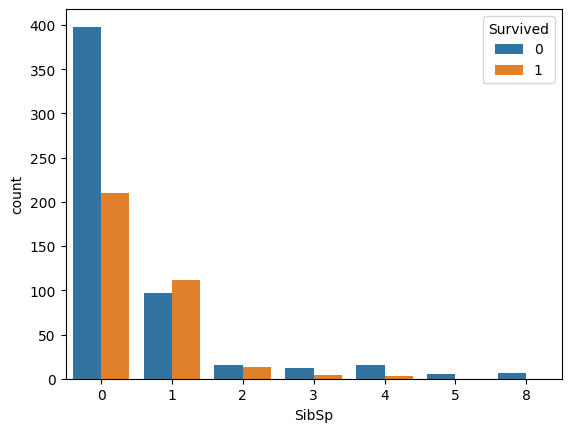

In [3]:
# SibSp와 Survived의 관계
# 형제자매 수가 0명이거나 3명 이상일 때 생존률이 낮다.

import seaborn as sns
sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
plt.legend(loc = 'upper right', title = 'Survived')

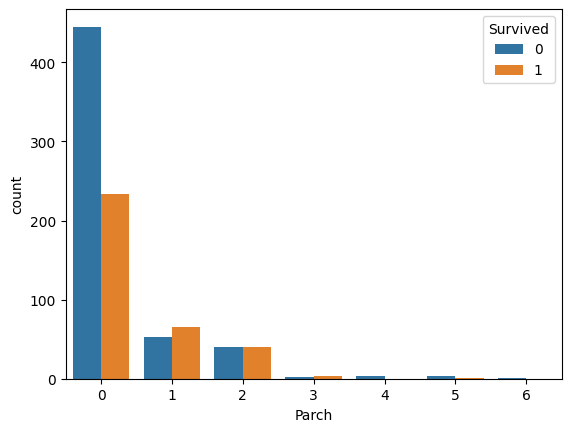

In [4]:
# Parch와 Survived의 관계
# 동승한 부모/자녀 수가 0이거나 3 이상일 때 생존률이 낮다.

sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.legend(loc = 'upper right', title = 'Survived')

### SibSp와 Parch 변수에서 승선한 가족 인원 수가 많을 수록 생존률이 낮아진다는 공통점을 찾을 수 있다.
#### -> 가족 사람 수라는 feature를 새로 만들 수 있다.

(-5.0, 250.0)

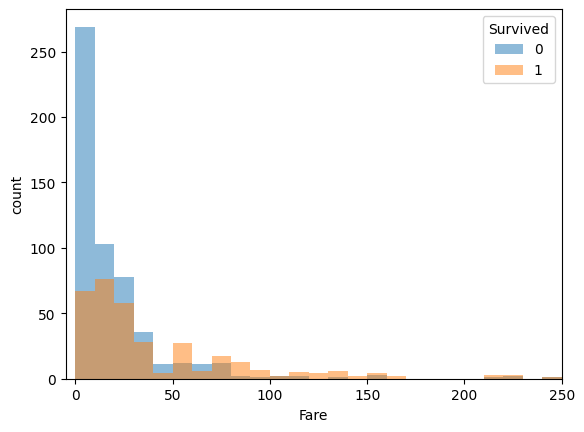

In [5]:
# Fare와 Survived의 관계
# 요금이 30 이하인 승객은 생존율이 낮고, 그중에서도 10 이하인 승객 생존율이 더 낮다.

import matplotlib.pyplot as plt

plt.hist(train.loc[train['Survived']==0, 'Fare'].dropna(),
        range=(0,250), bins=25, alpha=0.5, label='0')

plt.hist(train.loc[train['Survived']==1, 'Fare'].dropna(),
        range=(0,250), bins=25, alpha=0.5, label='1')

plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')
plt.xlim(-5, 250)

<Axes: xlabel='Pclass', ylabel='count'>

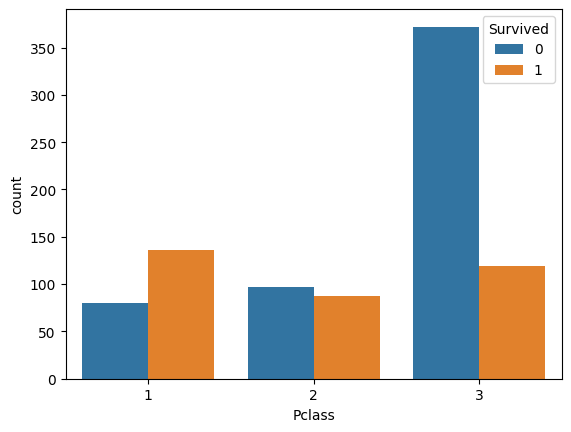

In [6]:
# Pclass와 Survived의 관계
# Pclass가 3으로 늘어날 수록 생존률이 낮아짐

sns.countplot(x='Pclass', hue='Survived', data=train)

<Axes: xlabel='Sex', ylabel='count'>

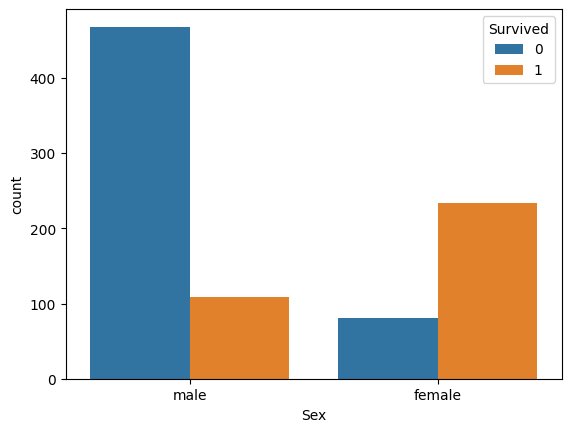

In [7]:
# Sex와 Survived의 관계
# 남성은 생존율이 낮고 여성은 높다. -> 매우 중요한 feature

sns.countplot(x='Sex', hue='Survived', data=train)

<Axes: xlabel='Embarked', ylabel='count'>

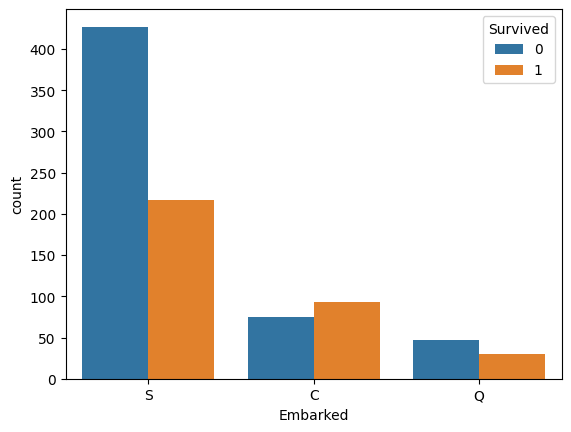

In [8]:
# Embarked(탑승지)와 Survived의 관계
# s와 q는 생존율이 낮고 c는 높다.

sns.countplot(x='Embarked', hue='Survived', data=train)